<a href="https://colab.research.google.com/github/muneeb-kk/All-Assignments/blob/main/Langchain_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import userdata
gemini_api_key= userdata.get("GEMINI_API_KEY")

In [4]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00


In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate

In [6]:

initial_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "change the {question} to a image generation prompt"
)
second_promt = PromptTemplate(
    input_variables = ["initial_response"],
    template = "read this {first_response} and summarize this into 2 lines for best image genaration!"
)

In [7]:
llm = ChatGoogleGenerativeAI(
    api_key = gemini_api_key,
    model = "gemini-2.0-flash-exp",
    temperature = 0.5
    max_output_token = 75
)

In [11]:
first_chain = initial_prompt | llm
second_chain = second_promt | llm

In [12]:

from diffusers import StableDiffusionPipeline
import torch


In [13]:
first_response = first_chain.invoke({"question" : input("type anything : ")})
print("first_chain " , first_response)

second_response = second_chain.invoke({"first_response" : first_response})
print("second_chain " , second_response)

print("\nGenerating the image ...")

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

if torch.cuda.is_available():
    pipe.to("cuda")

image = pipe(first_response.content).images[0]
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")

type anything : Image of illusion magic
first_chain  content='Okay, let\'s transform "Image of illusion magic" into a variety of image generation prompts, exploring different styles and focuses. Here are a few options, ranging from general to more specific:\n\n**General Prompts:**\n\n*   **"A swirling vortex of colorful energy, with hints of playing cards and doves, representing illusion magic."** (Focuses on visual effects)\n*   **"A mysterious figure cloaked in shadows, with glowing hands manipulating light and shimmering illusions."** (Focuses on a character)\n*   **"A stage filled with smoke and mirrors, where impossible objects appear and disappear, showcasing the art of illusion magic."** (Focuses on a setting)\n*   **"A surreal scene where reality bends and distorts, creating impossible shapes and perspectives, depicting illusion magic."** (Focuses on abstract concepts)\n\n**More Specific Prompts:**\n\n*   **"A close-up of a magician\'s hands, manipulating a deck of cards that s

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (771 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['" a mysterious figure cloaked in shadows , with glowing hands manipulating light and shimmering illusions ."** ( focuses on a character ) * **" a stage filled with smoke and mirrors , where impossible objects appear and disappear , showcasing the art of illusion magic ."** ( focuses on a setting ) * **" a surreal scene where reality bends and distorts , creating impossible shapes and perspectives , depicting illusion magic ."** ( focuses on abstract concepts ) ** more specific prompts :** * **" a close - up of a magician \'s hands , manipulating a deck of cards that seem to shimmer and change in impossible ways , using illusion magic ."** ( focuses on detail and action ) * **" a grand hall where objects f

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


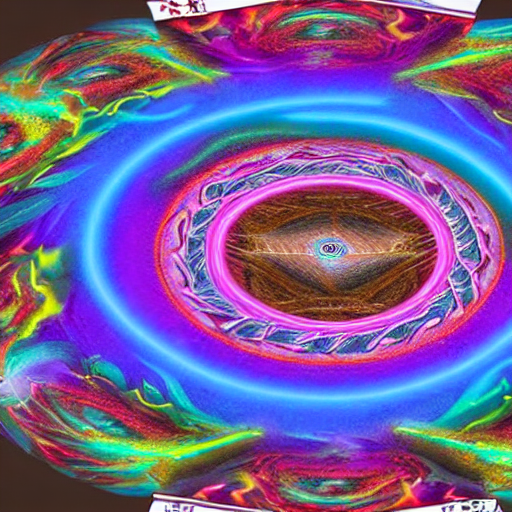

In [15]:
image